In [344]:
from SafeTransformer import SafeTransformer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [359]:
def y_function(value, value2):
    if value2 > 3.5:
        return 0
    if value > -2 and value < 2:
        return 1
    if value < -4:
        return 1
    if value > 4:
        return 0
    else:
        return 0

In [360]:
n = 500

In [361]:
X = pd.DataFrame(data={'X': np.linspace(-5, 5, n),'X2': np.random.uniform(low=0, high=5, size=n)})
y = pd.Series(map(lambda value: y_function(value[0], value[1]), zip(X['X'], X['X2'])))
X['X'] = X['X'] + np.random.normal(size=n, scale=0.4)

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [376]:
surrogate_model = XGBClassifier().fit(X_train, y_train)
surrogate_model_predictions = surrogate_model.predict(X_test)
accuracy_score(y_test, surrogate_model_predictions)

0.91200000000000003

In [377]:
base_model = LogisticRegression().fit(X_train, y_train)
base_predictions = base_model.predict(X_test)

In [378]:
print(accuracy_score(y_test, base_predictions))

0.608


In [379]:
pen=0.5
safe_transformer = SafeTransformer(model=surrogate_model, penalty=pen)

safe_transformer = safe_transformer.fit(X_train)

X_train_transformed = safe_transformer.transform(X_train)

X_test_transformed = safe_transformer.transform(X_test)

In [380]:
model_transformed = LogisticRegression()

model_transformed = model_transformed.fit(X_train_transformed, y_train)

transformed_predictions = model_transformed.predict(X_test_transformed)

In [381]:
print(accuracy_score(y_test, transformed_predictions))

0.904


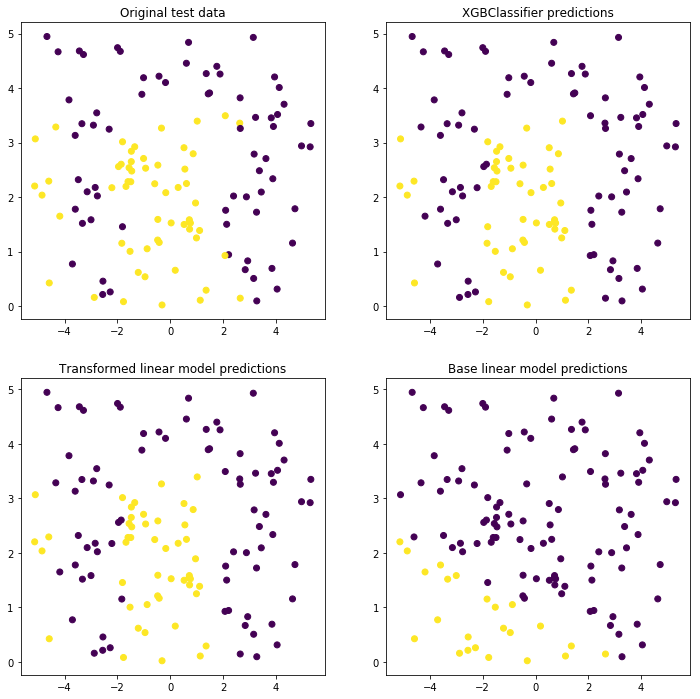

In [383]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
ax1.scatter(X_test['X'], X_test['X2'], c=y_test)
ax1.set_title('Original test data')
ax2.scatter(X_test['X'], X_test['X2'], c=surrogate_model_predictions)
ax2.set_title("XGBClassifier predictions")
ax3.scatter(X_test['X'], X_test['X2'], c=transformed_predictions)
ax3.set_title("Transformed linear model predictions")
ax4.scatter(X_test['X'], X_test['X2'], c=base_predictions)
ax4.set_title("Base linear model predictions")
plt.show()